<a href="https://colab.research.google.com/github/MosinInamdar/MachineLearning/blob/main/StockPredictorCrudeOil.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [35]:
# import pandas as pd
# import pandas_datareader.data as web
# import datetime

# # Define the time range for the dataset
# start_date = datetime.datetime(2010, 1, 1)
# end_date = datetime.datetime(2020, 7, 31)

# # Fetch WTI crude oil prices from FRED
# wti = web.DataReader('DCOILWTICO', 'fred', start_date, end_date)

# # Fetch Brent crude oil prices from FRED
# brent = web.DataReader('DCOILBRENTEU', 'fred', start_date, end_date)

# # Display the head of the datasets
# print("WTI Crude Oil Prices:")
# print(wti.head())

# print("\nBrent Crude Oil Prices:")
# print(brent.head())

# # Optionally, merge both datasets into a single DataFrame for convenience
# oil_data = pd.merge(wti, brent, left_index=True, right_index=True, how='outer')
# oil_data.columns = ['WTI', 'Brent']
# oil_data = oil_data.sort_index()

# # Save to a CSV file if needed
# oil_data.to_csv('crude_oil_prices.csv')

# # Display the merged dataset
# print("\nMerged Crude Oil Data:")
# print(oil_data.head())

In [36]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Model, clone_model
from tensorflow.keras.layers import Input, LSTM, Dense
from tensorflow.keras.optimizers import Adam
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import mean_squared_error, r2_score
import datetime
import random
import os

# Set seeds for reproducibility
np.random.seed(42)
tf.random.set_seed(42)
random.seed(42)

In [37]:
import pandas as pd
import pandas_datareader.data as web
import datetime

# Define the time range for the dataset
start_date = datetime.datetime(2010, 1, 1)
end_date = datetime.datetime(2020, 7, 31)

# Fetch WTI crude oil prices from FRED
wti = web.DataReader('DCOILWTICO', 'fred', start_date, end_date)

# Display the head of the WTI dataset
print("WTI Crude Oil Prices:")
print(wti.head())

# Save WTI data to a CSV file
wti.to_csv('crude_oil_prices.csv')

# Display the dataset
print("\nWTI Crude Oil Data:")
print(wti.head())


WTI Crude Oil Prices:
            DCOILWTICO
DATE                  
2010-01-01         NaN
2010-01-04       81.52
2010-01-05       81.74
2010-01-06       83.12
2010-01-07       82.60

WTI Crude Oil Data:
            DCOILWTICO
DATE                  
2010-01-01         NaN
2010-01-04       81.52
2010-01-05       81.74
2010-01-06       83.12
2010-01-07       82.60


In [38]:
# Load crude oil prices dataset
data = pd.read_csv('crude_oil_prices.csv', parse_dates=['DATE'], index_col='DATE')
data.drop_duplicates(inplace=True)
data.fillna(method='ffill', inplace=True)
data.fillna(method='bfill', inplace=True)

<ipython-input-38-191cbc9705c8>:4: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data.fillna(method='ffill', inplace=True)
<ipython-input-38-191cbc9705c8>:5: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data.fillna(method='bfill', inplace=True)


In [39]:
# Normalize data
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data.values)

In [40]:
# Function to create sliding window dataset
def create_sliding_window(data, window_size=5):
    X, y = [], []
    for i in range(len(data) - window_size):
        X.append(data[i:i+window_size])
        y.append(data[i+window_size])
    return np.array(X), np.array(y)

window_size = 5
X, y = create_sliding_window(data_scaled, window_size)
X = X.reshape(X.shape[0], window_size, 1)

In [41]:
# Define LSTM model
def build_dsd_lstm_model(input_shape, fc_units=64):
    inputs = Input(shape=input_shape)
    x = LSTM(128, return_sequences=True)(inputs)
    x = LSTM(128)(x)
    x = Dense(fc_units, activation='relu')(x)
    outputs = Dense(1)(x)
    model = Model(inputs, outputs)
    return model

input_shape = (window_size, 1)
model = build_dsd_lstm_model(input_shape)
model.compile(optimizer=Adam(learning_rate=0.001), loss='mse')

In [42]:
# Train LSTM model
model.fit(X, y, epochs=50, batch_size=64, validation_split=0.2, verbose=1)

Epoch 1/50
28/28 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.4666 - val_loss: 0.0515
Epoch 2/50
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0198 - val_loss: 0.0347
Epoch 3/50
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0136 - val_loss: 0.0333
Epoch 4/50
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0120 - val_loss: 0.0317
Epoch 5/50
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0118 - val_loss: 0.0308
Epoch 6/50
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0118 - val_loss: 0.0311
Epoch 7/50
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0119 - val_loss: 0.0315
Epoch 8/50
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0117 - val_loss: 0.0309
Epoch 9/50
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0113 - val_loss: 0.0299
Epoch 10/50
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0108 - val_loss: 0.0292
Epoch 11/50
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0105 - val_loss: 0.0289
Epoch 12/50
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0103 - val_

In [43]:
# Prune model weights
def prune_weights(model, sparsity=0.35):
    new_weights = []
    for w in model.get_weights():
        if w.ndim > 1:
            threshold = np.percentile(np.abs(w), sparsity * 100)
            w_pruned = np.where(np.abs(w) < threshold, 0, w)
            new_weights.append(w_pruned)
        else:
            new_weights.append(w)
    model.set_weights(new_weights)
    return model

model = prune_weights(model, sparsity=0.35)
model.compile(optimizer=Adam(learning_rate=0.0001), loss='mse')
model.fit(X, y, epochs=20, batch_size=64, validation_split=0.2, verbose=1)

Epoch 1/20
28/28 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0087 - val_loss: 0.0226
Epoch 2/20
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0047 - val_loss: 0.0225
Epoch 3/20
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0046 - val_loss: 0.0226
Epoch 4/20
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0046 - val_loss: 0.0226
Epoch 5/20
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0046 - val_loss: 0.0225
Epoch 6/20
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0045 - val_loss: 0.0225
Epoch 7/20
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0045 - val_loss: 0.0225
Epoch 8/20
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0045 - val_loss: 0.0225
Epoch 9/20
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0045 - val_loss: 0.0225
Epoch 10/20
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0045 - val_loss: 0.0225
Epoch 11/20
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0044 - val_loss: 0.0225
Epoch 12/20
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0044 - val_l

In [44]:
# Clustering
X_flat = X.reshape((X.shape[0], -1))
n_clusters = 8
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
kmeans.fit(X_flat)
clusters = kmeans.predict(X_flat)

cluster_models = {}
for cluster in range(n_clusters):
    idx = np.where(clusters == cluster)[0]
    X_cluster, y_cluster = X[idx], y[idx]

    model_cluster = clone_model(model)
    model_cluster.set_weights(model.get_weights())
    model_cluster.compile(optimizer=Adam(learning_rate=0.00001), loss='mse')

    model_cluster.fit(X_cluster, y_cluster, epochs=10, batch_size=64, verbose=1)
    cluster_models[cluster] = model_cluster

Epoch 1/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 0.0045
Epoch 2/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0044 
Epoch 3/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0044 
Epoch 4/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0044  
Epoch 5/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0044
Epoch 6/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0044 
Epoch 7/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0044
Epoch 8/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0044 
Epoch 9/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0044 
Epoch 10/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0044 
Epoch 1/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.0028
Epoch 2/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0027 
Epoch 3/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0027 
Epoch 4/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0027 
Epoch 5/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0027 
Epoch 6/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s

In [45]:
# Prediction function
def predict_with_cluster(input_sample):
    input_sample_scaled = input_sample.reshape(1, window_size, 1)
    input_flat = input_sample_scaled.reshape(1, -1)
    cluster = kmeans.predict(input_flat)[0]
    model_cluster = cluster_models[cluster]
    prediction = model_cluster.predict(input_sample_scaled)
    return prediction, cluster

In [46]:
# Predict using last window
sample_input = X[-1]
predicted_value, cluster_assigned = predict_with_cluster(sample_input)
print(f"Predicted value: {predicted_value[0][0]}, Assigned cluster: {cluster_assigned}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 171ms/step
Predicted value: -1.288669228553772, Assigned cluster: 3


69/69 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
MSE: 0.0079, RMSE: 0.0892, R²: 0.9921


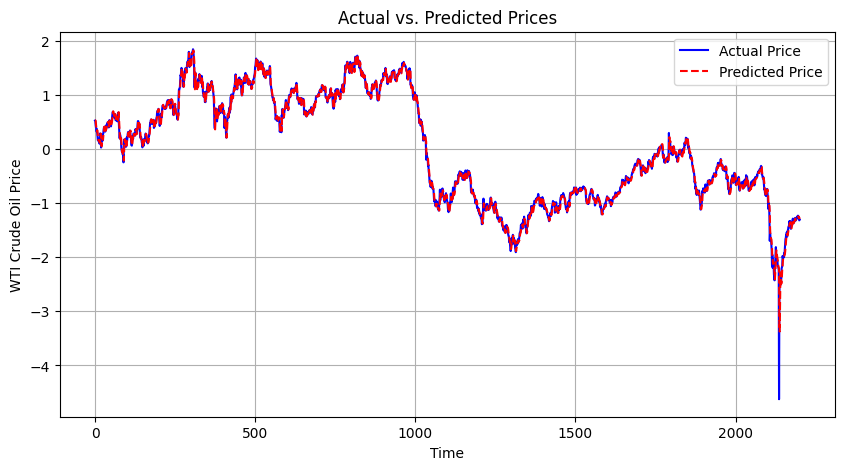

In [48]:
# Model Evaluation
def evaluate_model(y_true, y_pred, title="Actual vs. Predicted Prices"):
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_true, y_pred)
    print(f"MSE: {mse:.4f}, RMSE: {rmse:.4f}, R²: {r2:.4f}")
    plt.figure(figsize=(10, 5))
    plt.plot(y_true, label="Actual Price", color="blue")
    plt.plot(y_pred, label="Predicted Price", color="red", linestyle="--")
    plt.xlabel("Time")
    plt.ylabel("WTI Crude Oil Price")
    plt.title(title)
    plt.legend()
    plt.grid(True)
    plt.show()

# Generate predictions for evaluation
y_pred = model.predict(X)
evaluate_model(y, y_pred)